**Numerical Solution of the wave equation using finite differences method**

Consider the acoustic wave equation in 1D (note that the density is constant).

$$ 
\partial_t^2 p(x,t) = c(x)^2 \partial_x^2 p(x,t) + s(x,t) \label{eq1}\tag{1}
$$

where $p$ is the pressure, $c$ is the acoustic velocity, and $s$ is the source term. From the finite difference formula one obtains:

$$
\partial_t^2 p(x,t) \approx \frac{p(x, t+dt) - 2p(x,t) + p(x, t-dt)}{dt^2} \label{eq2}\tag{2}
$$

Similarly for the space derivative:
$$
\partial_x^2 p(x,t) \approx \frac{p(x + dx, t) - 2p(x,t) + p(x - dx, t)}{dx^2} \label{eq3}\tag{3}
$$


Introducting Eq.([2](#mjx-eqn-eq1)) and Eq.([3](#mjx-eqn-eq3)) in the wave equation ([1](#mjx-eqn-eq1)) to formulate the pressure $p(x)$ for the timestep $t+dt$ (future) as a function of the pressure at time $t$ (present) and $t-dt$ (past). This is called an explicit scheme for the *extrapolation* of the space-dependent field into the future only lookign at the nearest neighbourghood.

Therefore, the wave equation ([1](#mjx-eqn-eq1)):

$$
\frac{p_i^{n+1} - 2p_i^n + p_i^{n-1}}{dt^2} = c^2 (\partial_x^2p)+ S_i^n \label{eq4}\tag{4}
$$

The extrapolation scheme for $p_i^{n+1}$:


$$
p_i^{n+1} = C_i^2 \frac{dt^2}{dx^2}[p^n_{j+1} - 2p_j^n +p_{j-1}^n] + 2p_j^n - p_j^{n-1} +S_j^n dt^2 \label{eq5}\tag{5}
$$


Additionally, we know that the source term:

$$
S(x,t) = \delta(x-x_s)f(t)  \label{eq6}\tag{6}
$$

The function for the wave simulation problems:

$$
f(t) = -8f_0*(t-t_0)e^{-(4f_0)^2(t - t_0)^2} \label{eq7}\tag{7}
$$



In [1]:
#import Libraries 
#--------------------------------------------
import numpy as np
import matplotlib
# Show Plot in The Notebook
matplotlib.use("nbagg")
import matplotlib.pyplot as plt

# Sub-plot Configuration

from matplotlib import gridspec    #How to create grid-shaped combinations of axes
# Ignore warning Messages
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Parameter Configuration
# ----------------------------------

nx = 10000                        # Number of grid points in the physical domain
xmax = 10000                      # Physical domain in meters
dx = xmax/(nx-1)                  # Grid point distance in x-direction
c0 = 334.0                        # Wave speed in medium (m/s)
isrc = int(nx/2)                  # Source location in grid in x-direction
#ir = irsc + 100                    # Receiver location in grid in x-direction
nt = 1001                         # Maximum number of timesteps
dt = 0.002                        # Time step

# Source time function parameters
f0 = 25.                          # Domain frequency of the source (Hz)
t0 = 4. / f0                      # source time shift

# Snapshot 
idisp = 5                         # Display frequency




In [3]:
# Plot Source Time Function
# --------------------------------

# Source time function (Gaussian)
# --------------------------------
src = np.zeros(nt + 1)
time = np.linspace(0 * dt, nt * dt, nt)
# First derivative of a Gaussian
src = -8. *(time - t0) * f0 * (np.exp(-1.0 * (4*f0) ** 2 * (time - t0) ** 2))


<IPython.core.display.Javascript object>


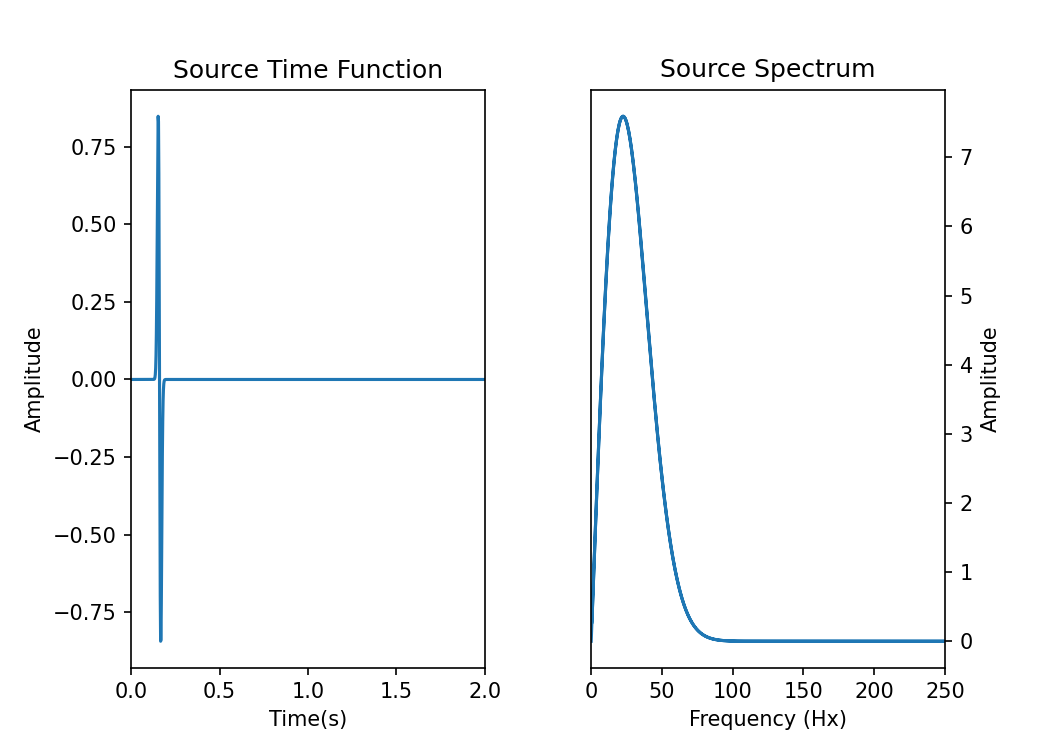

In [4]:
# Plot source time function 

# Plot position configuration
# ---------------------------

plt.ion         # Turn the interactive mode on
fig1 = plt.figure(figsize =(7, 5))
gs1 = gridspec.GridSpec(1, 2, width_ratios = [1, 1], hspace=0.3, wspace=0.3)

# Plot source time function
# ----------------------------
ax1 = plt.subplot(gs1[0])
ax1.plot(time, src)  # plot source time function
ax1.set_title('Source Time Function')
ax1.set_xlim(time[0], time[-1])
ax1.set_xlabel('Time(s)')
ax1.set_ylabel('Amplitude')
#Plot source spectrum
#-----------------------------------
#Compute the one-dimensional discrete Fourier Transform.
# with numpy.fft.fft(a, n=None, axis=-1, norm=None)
#This function computes the one-dimensional n-point discrete 
#Fourier Transform (DFT) with the efficient Fast Fourier Transform 
#(FFT) algorithm [CT].
#--------------------------------------------
ax2 = plt.subplot(gs1[1])
spec = np.fft.fft(src)                    #Source time function in frequency domain
#fftfreq --> Frequency bins for given FFT parameters.
freq = np.fft.fftfreq(spec.size, d = dt)   # time domain to frequency domain 
ax2.plot(np.abs(freq),np.abs(spec))       #Plot frequency and amplitude
ax2.set_xlim(0, 250)                      # Only display frequency from 0 to 250 Hz
ax2.set_title('Source Spectrum')
ax2.set_xlabel('Frequency (Hx)')
ax2.set_ylabel('Amplitude')

ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right')

plt.show()





<IPython.core.display.Javascript object>


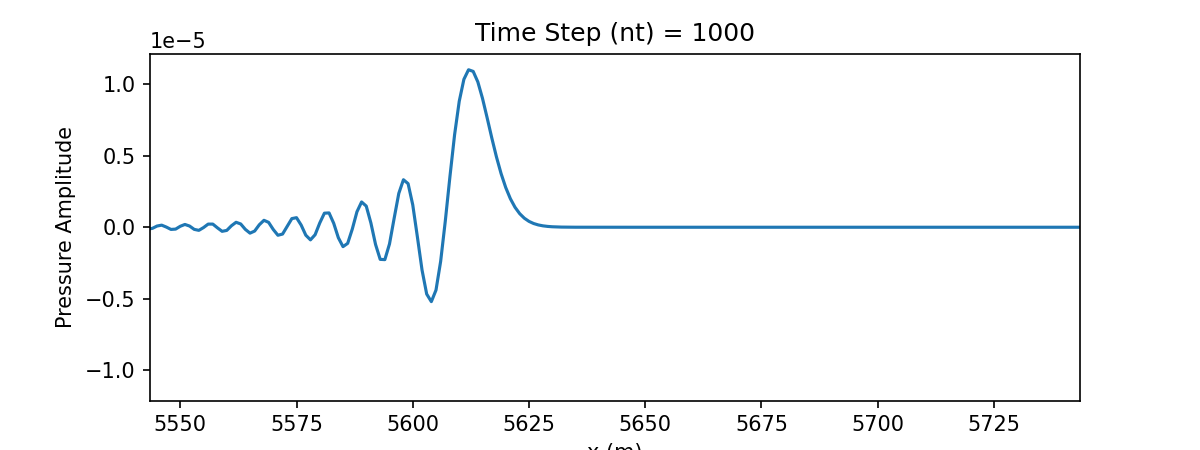

In [5]:
# Snapshot & Seismogram
# Initializing pressure

p = np.zeros(nx)             # pressure p at time n (now)
pold = np.zeros(nx)          # p at time n-1 (past)
pnew = np.zeros(nx)          # p at time n+1 (present)
d2px = np.zeros(nx)          # 2nd space derivative of p

# Initialize model (assume homogenous model)
#-------------------------------------

c = np.zeros(nx)
c = c + c0                   # Initialize wave velocity 

# Initialize coordinate
#----------------------------------------

x = np.arange(nx)
x = x * dx                   # Coordinate in x-direction

# Plot position configuration
#-------------------------

plt.ion()
fig2 = plt.figure(figsize=(8, 3))
gs2 = gridspec.GridSpec(1,1,width_ratios=[1],hspace=0.3,wspace=0.3)

# Plot 1D wave propagation 
#---------------------------
# the comma is needed to update the variable
ax3 = plt.subplot(gs2[0])
leg1,= ax3.plot(isrc, 0, 'r*', markersize=11)       # Define position of the source in plot/snapshot
# leg2, = ax3.plot(ir, 0, 'k*, markersize=8)        # Define position of the receiver in plot/snapshot
up31,= ax3.plot(p)                                  # Update p each time step
ax3.set_xlim(0, xmax)
ax3.set_ylim(-np.max(p), np.max(p))
ax3.set_title('Time Step (nt) = 0')
ax3.set_xlabel('x (m)')
ax3.set_ylabel('Pressure Amplitude')
#ax3.legend((leg1,leg2), ('Source', 'Receiver'), loc='upper right', fontsize=10, numpoint=1)

plt.show()

In [6]:
# Space propagation 
# Wave propagation in 1D (Finite Difference Solution)
# ------------------------------------------------------------
for it in range(nt):                                                 # Loop over time
    for i in range(1, nx - 1):                                       # The 2nd order derivative in space
        d2px[i] = (p[i + 1] - 2 * p[i] + p[i - 1])/dx ** 2           # 2nd derivative in FD
   
    # Time Extrapolation (see Eq.5)
    #------------------------------
    pnew = 2 * p - pold + c ** 2 * dt ** 2 * d2px 
    
    # Add the source term
    # --------------------  
    pnew[isrc] = pnew[isrc] + src[it] / (dx) * dt ** 2              # Absolute pressure w.r.t. the analytical solution
    
    # Remap Time Levels
    #-------------------
    pold, p = p, pnew
    
    # Plot pressure field 
    #-------------------
    if (it % idisp) == 0:                                          # This computes the time dispersion 
        ax3.set_title('Time Step (nt) = %d' %it)
        ax3.set_ylim(-1.1*np.max(abs(p)), 1.1*np.max(abs(p)))
        #plot arround proparagating wave
        window= 100; xshift=25
        ax3.set_xlim(isrc*dx+c0*it*dt-window*dx-xshift, isrc*dx+c0*it*dt+window*dx-xshift)
        up31.set_ydata(p)
        plt.gcf().canvas.draw()

**Note** By increasing the time-step to $dt = 0.005$ the behavour of the function starts with a string dispersion. One can use $dt = 0.001$ or $0.002$. The dispersion come a few seconds of running after. 
I decided to keep $dt = 0.002$ and $f_0$ between $20$ to $35$. Althoug there is dispersion on these cases it is easier to see how the function behaves without exploding too fast, as in the case of $f_0 = 100$.